# APPLIED DEEP LEARNING FINAL PROJECT
## Deep Learning Solution
### Sandra Marcela Meneses - Diego Fernando López Castillo

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage import io
from tqdm import tqdm
#import os
%matplotlib inline

In [2]:
path = ''

In [3]:
dataTraining = pd.read_csv(os.path.join(path, 'data','dataTraining.csv'), encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv(os.path.join(path,'data', 'dataTesting.csv'), encoding='UTF-8', index_col=0)

In [4]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [5]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [6]:
test_files=dataTesting.index.values
train_files=dataTraining.index.values

In [7]:
train_files.shape

(7895,)

In [8]:
import os,shutil
import pandas as pd
from pathlib import Path,PureWindowsPath
DIR = '../Proyecto final/images/'
TRAIN_DIR = '../Proyecto final/train/'
TEST_DIR = '../Proyecto final/Test/'


In [29]:
os.makedirs(TRAIN_DIR)
os.makedirs(TEST_DIR)

In [9]:
src_path= DIR
dst_train= TRAIN_DIR
dst_test= TEST_DIR

In [ ]:
for i in train_files:
    fname1=str(i)+'.jpeg'
    src = os.path.join(src_path, fname1)
    dst = os.path.join(dst_train, fname1)
    shutil.copyfile(src, dst)

In [31]:
for j in test_files:
    fname2=str(j)+'.jpeg'
    src = os.path.join(src_path, fname2)
    dst2 = os.path.join(dst_test, fname2)
    shutil.copyfile(src, dst2)

In [10]:
DIR2 = DIR
TRAIN_DIR2 = '../Proyecto final/model/train/'
TEST_DIR2 = '../Proyecto final/model/test/'

In [40]:
os.makedirs(TRAIN_DIR2)
os.makedirs(TEST_DIR2)

In [11]:
from sklearn.model_selection import train_test_split
import os, sys

In [12]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))

le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [13]:
X= dataTraining.index.values

In [14]:
src_path2= DIR2
dst_train2= TRAIN_DIR2
dst_test2= TEST_DIR2
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X, y_genres, test_size=0.33, random_state=42)

In [18]:
for k in X_train:
    fname3=str(k)+'.jpeg'
    src2 = os.path.join(src_path2, fname3)
    dst2 = os.path.join(dst_train2, fname3)
    shutil.copyfile(src2, dst2)

In [53]:
for l in X_test:
    fname4=str(l)+'.jpeg'
    src2 = os.path.join(src_path2, fname4)
    dst2 = os.path.join(dst_test2, fname4)
    shutil.copyfile(src2, dst2)

## Construccion Modelo Imagenes

In [15]:
img_width, img_height = 256, 256
top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'model/train'
validation_data_dir = 'model/test'
epochs = 50
batch_size = 16

Using TensorFlow backend.


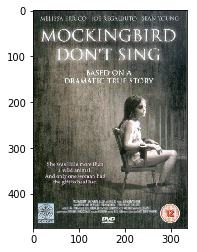

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img,image

img = load_img('../Proyecto final/model/train/8.jpeg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
plt.imshow(img)
plt.show()

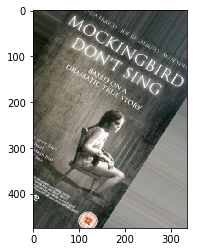

In [17]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('../Proyecto final/model/train/8.jpeg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, _, _)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely
plt.imshow(batch[0]/255) 
plt.show()

## Read all Images "gray"

In [18]:
image = io.imread(os.path.join(path, 'images_resize_gray', str(dataTraining.index[0]) + '_resize_gray.jpeg'))

In [19]:
image

array([[ 3,  3,  3, ..., 57, 55, 51],
       [ 3,  3,  3, ..., 99, 98, 95],
       [ 3,  3,  3, ..., 97, 96, 94],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

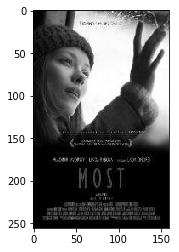

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(image, cmap='gray')

In [21]:
images_training = []
for i in tqdm(dataTraining.index):
    images_training.append(io.imread(os.path.join(path, 'images_resize_gray', str(i) + '_resize_gray.jpeg')).flatten())

100%|██████████| 7895/7895 [00:05<00:00, 1562.19it/s]


In [22]:
images_training = np.stack(images_training)

images_training.shape, dataTraining.shape[0]

((7895, 40960), 7895)

In [23]:
images_testing = []
for i in tqdm(dataTesting.index):
    images_testing.append(io.imread(os.path.join(path, 'images_resize_gray', str(i) + '_resize_gray.jpeg')).flatten())

images_testing = np.stack(images_testing)

images_testing.shape, dataTesting.shape[0]

100%|██████████| 3383/3383 [00:01<00:00, 1721.76it/s]


((3383, 40960), 3383)

## Neural Network for Images using Transfered Learning

In [25]:
from keras.applications import VGG16
from skimage.transform import resize

vgg16 = VGG16(include_top=False, weights='imagenet')

def apply_vgg_grayscale(images):

    images_ = []
    for img in tqdm(images):

        # reshape
        img = img.reshape((256, 160))

        # rescale
        img = resize(img, (224, 224), mode='reflect')

        # repeat
        img = [img] * 3

        images_.append(img)


    # To numpy array
    images_ = np.array(images_)

    # move channel to last axis
    images_ = np.rollaxis(images_, 1, 4)

    # Apply vgg
    images_vgg = vgg16.predict(images_)
    
    return images_vgg

images_training_vgg = apply_vgg_grayscale(images_training)
images_training_vgg.shape

100%|██████████| 7895/7895 [00:22<00:00, 347.87it/s]


(7895, 7, 7, 512)

In [26]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense,Conv2D,Activation,MaxPooling2D
from keras import applications
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import math
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img,image

In [299]:
from keras.optimizers import rmsprop
model = Sequential()  
model.add(Conv2D(128, (7, 7), padding='same',input_shape=(7, 7, 512)))
model.add(Conv2D(64, (7, 7), padding='same'))
model.add(Conv2D(32, (7, 7), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=24))
model.add(Activation('sigmoid'))

In [300]:
from keras.optimizers import Adam
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.0001),
              metrics = ['accuracy'])

In [301]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 7, 7, 128)         3211392   
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 7, 7, 64)          401472    
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 7, 7, 32)          100384    
_________________________________________________________________
activation_46 (Activation)   (None, 7, 7, 32)          0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 288)               0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 288)               0         
__________

In [302]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(images_training_vgg, y_genres, test_size=0.33, random_state=42)

In [303]:
model.fit(X_train, y_train_genres, epochs=5, verbose=2)

Epoch 1/5
 - 53s - loss: 7.7753 - acc: 0.1660
Epoch 2/5
 - 50s - loss: 7.4131 - acc: 0.2074
Epoch 3/5
 - 50s - loss: 7.1913 - acc: 0.2290
Epoch 4/5
 - 50s - loss: 7.0045 - acc: 0.2363
Epoch 5/5
 - 50s - loss: 6.8073 - acc: 0.2424


In [304]:
print(model.predict(X_test))

[[0.36289328 0.29346648 0.02024684 ... 0.81274575 0.10276187 0.03082961]
 [0.44014573 0.15404887 0.01927056 ... 0.49206465 0.07890099 0.14381425]
 [0.75402933 0.33625773 0.02841886 ... 0.81762433 0.06801075 0.08475776]
 ...
 [0.12280097 0.06931835 0.00842737 ... 0.2460966  0.01907044 0.04512784]
 [0.333202   0.19923061 0.0164367  ... 0.3229446  0.08640868 0.05675358]
 [0.2872556  0.03804918 0.00454407 ... 0.94044644 0.16701505 0.10916011]]


In [305]:
y_pred_nw = model.predict_proba(X_test)

In [306]:
roc_auc_score(y_test_genres, y_pred_nw, average='macro')

0.6984994711906864

In [46]:
images_testing_vgg = apply_vgg_grayscale(images_testing)
images_testing_vgg.shape

100%|██████████| 3383/3383 [00:07<00:00, 441.72it/s]


(3383, 7, 7, 512)

In [47]:
images_testing_vgg.shape

(3383, 7, 7, 512)

## Neutral Network for Text

In [50]:
X= dataTraining['plot']
Xt_train, Xt_test = train_test_split(X, test_size=0.33, random_state=42)

### Create count vectorizer with ngrams

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1, 2), max_features=1000, stop_words='english')
X_dtm = vect.fit_transform(Xt_train)
X_dtm2 =  vect.transform(Xt_test)
X2=vect.transform(dataTesting['plot'])
X_dtm.shape

(5289, 1000)

In [53]:
print(vect.get_stop_words())

frozenset({'none', 'thereupon', 'she', 'hundred', 'with', 'everything', 'any', 'its', 'yet', 'my', 'at', 'him', 'amoungst', 'thus', 'show', 'becomes', 'until', 'elsewhere', 'latterly', 'cant', 'over', 'while', 'they', 'between', 'am', 'be', 'bottom', 'the', 'done', 'noone', 'three', 'third', 'around', 'con', 'of', 'whom', 'sometimes', 'others', 'describe', 'five', 'toward', 'than', 'nevertheless', 'should', 'ourselves', 'onto', 'or', 'every', 'nowhere', 'before', 'where', 'whereupon', 'hers', 'them', 'thin', 'across', 'fifty', 'never', 'throughout', 'meanwhile', 'what', 'seem', 'therefore', 'enough', 'six', 'were', 'becoming', 'except', 'always', 'next', 'often', 'when', 'cry', 'has', 'nor', 'upon', 'both', 'side', 'into', 'de', 'system', 'might', 'about', 'during', 'almost', 'being', 'itself', 'made', 'and', 'everywhere', 'rather', 're', 'you', 'somehow', 'moreover', 'even', 'anyone', 'get', 'since', 'do', 'herein', 'now', 'but', 'fire', 'below', 'hereby', 'together', 'some', 'see', '

In [54]:
print(vect.get_feature_names()[:50])

['abandoned', 'able', 'accepts', 'accident', 'accidentally', 'act', 'action', 'actor', 'actress', 'actually', 'adam', 'adult', 'adventure', 'affair', 'age', 'aged', 'agent', 'agents', 'ago', 'agrees', 'air', 'alan', 'alex', 'alice', 'alien', 'alive', 'america', 'american', 'ancient', 'andrew', 'angeles', 'ann', 'anna', 'annie', 'apart', 'apartment', 'appears', 'area', 'army', 'arrested', 'arrival', 'arrive', 'arrives', 'art', 'artist', 'asks', 'aspiring', 'assigned', 'assistant', 'attack']


In [55]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, BatchNormalization,Flatten
from keras.optimizers import RMSprop
from keras.callbacks import History
from livelossplot import PlotLossesKeras

In [57]:
print (X_dtm.shape)
print (y_train_genres.shape)

(5289, 1000)
(5289, 24)


In [58]:
Y = y_train_genres
Y2 = y_test_genres

In [59]:
input_shape=X_dtm.shape[1:]
input_shape

(1000,)

In [265]:
#Dropout ayuda a evitar el overfitting
model2 = Sequential()
model2.add(Dense(units=256,input_shape=X_dtm.shape[1:]))
model2.add(Dropout(0.3))
model2.add(Activation('tanh'))
model2.add(BatchNormalization())
model2.add(Dropout(0.7))
model2.add(Dense(units=24))
model2.add(Activation('sigmoid'))

In [266]:
from keras.optimizers import SGD,RMSprop,Adagrad,Adam
model2.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.01),
              metrics = ['accuracy'])

In [267]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 256)               256256    
_________________________________________________________________
dropout_41 (Dropout)         (None, 256)               0         
_________________________________________________________________
activation_36 (Activation)   (None, 256)               0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_42 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 24)                6168      
_________________________________________________________________
activation_37 (Activation)   (None, 24)                0         
Total para

In [268]:
model2.fit(X_dtm, Y, epochs=50, verbose=2)

Epoch 1/50
 - 4s - loss: 7.8586 - acc: 0.1840
Epoch 2/50
 - 1s - loss: 6.7704 - acc: 0.2490
Epoch 3/50
 - 1s - loss: 6.4369 - acc: 0.2847
Epoch 4/50
 - 1s - loss: 6.2358 - acc: 0.2815
Epoch 5/50
 - 1s - loss: 6.1088 - acc: 0.2889
Epoch 6/50
 - 1s - loss: 6.0329 - acc: 0.2868
Epoch 7/50
 - 1s - loss: 5.9285 - acc: 0.3008
Epoch 8/50
 - 1s - loss: 5.8491 - acc: 0.2997
Epoch 9/50
 - 1s - loss: 5.8296 - acc: 0.3086
Epoch 10/50
 - 1s - loss: 5.7760 - acc: 0.3050
Epoch 11/50
 - 1s - loss: 5.7367 - acc: 0.3239
Epoch 12/50
 - 1s - loss: 5.7041 - acc: 0.3175
Epoch 13/50
 - 1s - loss: 5.6858 - acc: 0.3226
Epoch 14/50
 - 1s - loss: 5.6109 - acc: 0.3348
Epoch 15/50
 - 1s - loss: 5.6017 - acc: 0.3261
Epoch 16/50
 - 1s - loss: 5.5742 - acc: 0.3339
Epoch 17/50
 - 1s - loss: 5.5765 - acc: 0.3320
Epoch 18/50
 - 1s - loss: 5.5547 - acc: 0.3388
Epoch 19/50
 - 1s - loss: 5.5132 - acc: 0.3331
Epoch 20/50
 - 1s - loss: 5.5443 - acc: 0.3356
Epoch 21/50
 - 1s - loss: 5.4860 - acc: 0.3333
Epoch 22/50
 - 1s - lo

In [269]:
print(model2.predict(X_dtm2))

[[1.1502488e-01 1.4200804e-03 4.1809503e-06 ... 9.7702706e-01
  9.8624639e-04 8.2903756e-03]
 [4.3672016e-01 7.1753561e-01 2.3261728e-03 ... 1.3820109e-01
  9.9993813e-01 4.3467226e-05]
 [9.9164611e-01 2.8849706e-02 2.1114536e-05 ... 9.9902344e-01
  2.8636359e-04 5.5570315e-05]
 ...
 [9.9174716e-03 5.9061509e-02 7.5101117e-03 ... 3.3108409e-02
  1.0808740e-06 1.0336724e-02]
 [1.2337527e-05 3.8004231e-03 8.5650355e-04 ... 4.6229523e-02
  1.3011570e-05 1.4358262e-05]
 [9.6360832e-02 1.1204765e-01 6.6063586e-03 ... 9.6791482e-01
  1.4398574e-05 7.6019164e-04]]


In [270]:
y_pred_nw2 = model2.predict_proba(X_dtm2)

In [271]:
roc_auc_score(Y2, model2.predict(X_dtm2), average='macro')

0.8341701980262809

### Merge de Neural Netowork Images and Text Models

In [307]:
AUC_scores_mix=[]
w_range=range(10, 100, 1)
for w in w_range:
    y_pred_mix=(w/100)*y_pred_nw2+y_pred_nw*((100-w)/100)
    AUC_scores_mix.append(roc_auc_score(y_test_genres, y_pred_mix, average='macro'))

Text(0,0.5,'AUC')

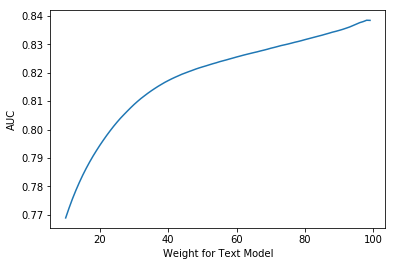

In [308]:
plt.plot(w_range, AUC_scores_mix)
plt.xlabel('Weight for Text Model')
plt.ylabel('AUC')

In [309]:
import numpy as np
np.amax(AUC_scores_mix)

0.8384562115204984

In [312]:
w=98
y_pred_mix=(w/100)*y_pred_nw2+y_pred_nw*((100-w)/100)
roc_auc_score(y_test_genres, y_pred_mix, average='macro')

0.8384562115204984

# Export models to test

Export results Neural Network with transfer learning vgg16 for images

In [314]:
images_testing_vgg.shape

(3383, 7, 7, 512)

In [315]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_nw = model.predict_proba(images_testing_vgg)

pd.DataFrame(y_pred_test_nw, index=dataTesting.index, columns=cols).to_csv('Final_pred_img_NW_VGG2.csv', index_label='ID')

Export results Neural Network for Text

In [317]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_nw2 = model2.predict_proba(vect.transform(dataTesting['plot']))

pd.DataFrame(y_pred_test_nw2, index=dataTesting.index, columns=cols).to_csv('Final_pred_text_NW2.csv', index_label='ID')

Export results Neural Network model for mixed model Images Transfer Learning VGG16+Text. Text model weight=0.84

In [318]:
w=98

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_mix=(w/100)*y_pred_test_nw2+y_pred_test_nw*((100-w)/100)

pd.DataFrame(y_pred_test_mix, index=dataTesting.index, columns=cols).to_csv('Final_pred_NW_MIX2.csv', index_label='ID')